In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
lakes = pd.read_csv('Lakes_Edit_Data.txt', sep = '\t') #Hmmm, what's wrong?

In [5]:
lakes.head()

,Number,TP,Status,TN,TN.TP,Chl.a,pH,Secchi.Depth,Colour,Temperature,Latitude,Longitude,Cyanobacteria,Anabaena,Microcystis,logCyano.1
0,12,24,Mesotrophic,440,11.0,12.0,8.0,2.2,20,20.4,61.01,22.12,0.0480,0.003,0.000,-3.036554
1,54,20,Mesotrophic,840,42.0,18.0,6.9,1.2,100,18.8,61.46,23.02,0.2184,0.058,0.000,-1.521427
2,15,8,Oligotrophic,370,46.3,3.2,7.0,5.3,15,18.5,61.03,23.15,0.0165,0.002,0.000,-4.104395
3,23,67,Eutrophic,990,14.8,36.0,7.4,0.4,160,19.4,61.24,23.19,0.0718,0.000,0.000,-2.633871
4,44,39,Eutrophic,810,20.8,26.0,8.9,0.5,60,20.1,60.50,23.29,0.3256,0.070,0.018,-1.122086


In [7]:
#Make status all uppercase EU, OLIGO, MESO
test = 'Mesotrophic'
print(test.upper()[:-7])


MESO


In [11]:
#Use Series methods
lakes['Status'].str.upper().str.slice(0,-7);

In [12]:
def convert(x):
    return x.upper()[:-7]

In [16]:
lakes['Status'].apply(convert);

In [22]:
#Use lambda
lakes['Status'] = lakes['Status'].apply(lambda x: x.upper()[:-7])

In [23]:
lakes.head()

,Number,TP,Status,TN,TN.TP,Chl.a,pH,Secchi.Depth,Colour,Temperature,Latitude,Longitude,Cyanobacteria,Anabaena,Microcystis,logCyano.1
0,12,24,MESO,440,11.0,12.0,8.0,2.2,20,20.4,61.01,22.12,0.0480,0.003,0.000,-3.036554
1,54,20,MESO,840,42.0,18.0,6.9,1.2,100,18.8,61.46,23.02,0.2184,0.058,0.000,-1.521427
2,15,8,OLIGO,370,46.3,3.2,7.0,5.3,15,18.5,61.03,23.15,0.0165,0.002,0.000,-4.104395
3,23,67,EU,990,14.8,36.0,7.4,0.4,160,19.4,61.24,23.19,0.0718,0.000,0.000,-2.633871
4,44,39,EU,810,20.8,26.0,8.9,0.5,60,20.1,60.50,23.29,0.3256,0.070,0.018,-1.122086


In [24]:
#Make status into an int: 0 for OLIGO, 1 for MESO, 2 for EU
def convert(trophic):
    if trophic == 'OLIGO':
        return 0
    elif trophic == 'MESO':
        return 1
    elif trophic == 'EU':
        return 2

In [26]:
stat = {'OLIGO':0, 'MESO':1, 'EU':2}
trophic = 'MESO'
stat.get(trophic)
stat[trophic]

1

In [25]:
lakes['Status'].apply(convert)

0     1
1     1
2     0
3     2
4     2
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    2
14    1
15    1
16    1
17    1
18    1
19    2
20    2
21    0
22    1
23    2
24    1
25    0
26    1
27    1
28    1
29    0
30    0
31    2
32    1
33    0
34    0
35    1
36    1
37    2
38    1
39    2
40    0
41    0
42    1
43    1
44    0
45    1
46    0
47    1
48    1
49    0
50    1
51    1
Name: Status, dtype: int64

In [27]:
#With a lambda
lakes['Status'] = lakes['Status'].apply(lambda trophic: stat.get(trophic))

In [28]:
lakes.head()

,Number,TP,Status,TN,TN.TP,Chl.a,pH,Secchi.Depth,Colour,Temperature,Latitude,Longitude,Cyanobacteria,Anabaena,Microcystis,logCyano.1
0,12,24,1,440,11.0,12.0,8.0,2.2,20,20.4,61.01,22.12,0.0480,0.003,0.000,-3.036554
1,54,20,1,840,42.0,18.0,6.9,1.2,100,18.8,61.46,23.02,0.2184,0.058,0.000,-1.521427
2,15,8,0,370,46.3,3.2,7.0,5.3,15,18.5,61.03,23.15,0.0165,0.002,0.000,-4.104395
3,23,67,2,990,14.8,36.0,7.4,0.4,160,19.4,61.24,23.19,0.0718,0.000,0.000,-2.633871
4,44,39,2,810,20.8,26.0,8.9,0.5,60,20.1,60.50,23.29,0.3256,0.070,0.018,-1.122086


### Some graphs

In [29]:
unemp = pd.read_csv('US_Unemployment_Oct2012.csv', index_col = 0)

In [31]:
unemp.loc['CA']

Unemployment    10.1
Name: CA, dtype: float64

In [32]:
unemp.index

Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY'],
      dtype='object', name='State')

In [30]:
unemp.head()

,Unemployment
State,
AL,7.1
AK,6.8
AZ,8.1
AR,7.2
CA,10.1


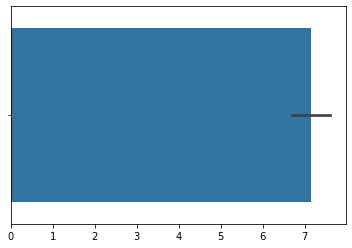

In [33]:
sns.barplot(unemp)

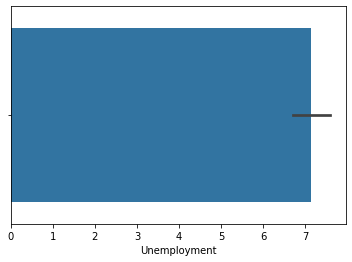

In [34]:
sns.barplot(unemp['Unemployment'])

In [35]:
sns.barplot(unemp['State'],unemp['Unemployment'])

KeyError: 'State'

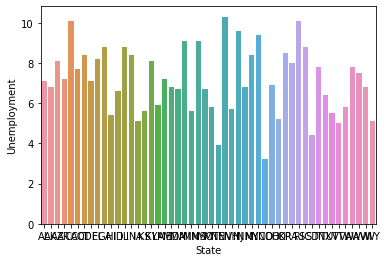

In [36]:
sns.barplot(unemp.index, unemp['Unemployment'])

In [1]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(unemp.index,unemp['Unemployment'], palette='winter')

NameError: name 'plt' is not defined

In [ ]:
#unemp_test.py file

### Pockets data

In [42]:
pockets = pd.read_csv('pockets.csv')

In [43]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False


In [45]:
#put fabric in all caps
pockets['fabric'] = pockets['fabric'].str.upper()

In [46]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% COTTON, 9% POLYESTER, 4% SPANDEX",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False


In [47]:
pockets['fabric'].str.contains('COTTON').sum()

79

In [48]:
pockets.shape

(80, 16)

In [50]:
pockets[~pockets['fabric'].str.contains('COTTON')] #Should be one row

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
14,7 for All Mankind,skinny,women,The Ankle Skinny,"89% COTTTON, 9% POLYESTER, 2% SPANDEX",199.0,13.0,13.5,6.0,15.0,12.5,16.5,13.7,12.5,11.5,False


In [51]:
#Fix this
pockets['fabric'] = pockets['fabric'].str.replace('COTTTON', 'COTTON')
#pockets.loc[14,'fabric'] = '89% COTTON, 9% POLYESTER, 2% SPANDEX'

In [52]:
#find any that don't have cotton now
pockets[~pockets['fabric'].str.contains('COTTON')]

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout


In [55]:
pockets['fabric'].value_counts()

98% COTTON, 2% SPANDEX                                 9
100% COTTON                                            8
98% COTTON, 2% ELASTANE                                7
99% COTTON, 1% ELASTANE                                5
99% COTTON, 1% SPANDEX                                 3
75% COTTON, 24% POLYESTER, 1% SPANDEX                  3
90% COTTON, 8% POLYESTER, 2% ELASTANE                  2
95% COTTON, 4% POLYESTER, 1% ELASTANE                  2
86% COTTON, 13% POLYESTER, 1% SPANDEX                  2
87% COTTON, 12% POLYESTER, 1% SPANDEX                  2
83% COTTON, 14% POLYESTER, 3% ELASTANE                 2
78% COTTON, 20% POLYESTER, 2% SPANDEX                  2
92% COTTON, 6% POLYESTER, 2% SPANDEX                   2
92% COTTON, 7% POLY, 1% ELASTANE                       2
92% COTTON, 6% POLYESTER, 2% ELASTANE                  1
91% COTTON, 7% POLYESTER, 2% ELASTANE                  1
72% COTTON, 19% POLYESTER, 8% RAYON, 1% SPANDEX        1
99% COTTON, 1% ELASTANE        

In [54]:
pockets['fabric'] = pockets['fabric'].str.replace('45% RAYON, 30% COTTON, 25% POLYESTER', \
                                                  '30% COTTON, 45% RAYON, 25% POLYESTER' )

In [143]:
text = '87% COTTON, 9% POLYESTER, 4% SPANDEX'
float(text.split('%')[0]) 

87.0

In [56]:
def convert(x):
    return float(x.split('%')[0])

In [58]:
pockets['cotton'] = pockets['fabric'].apply(lambda x: float(x.split('%')[0]))

In [59]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout,cotton
0,Arizona,skinny,women,Fave Super Skinny,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False,78.0
1,Arizona,straight,women,Perfect Boot,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False,78.0
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False,92.0
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False,92.0
4,Uniqlo,skinny,women,Skinny Fit,"87% COTTON, 9% POLYESTER, 4% SPANDEX",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False,87.0


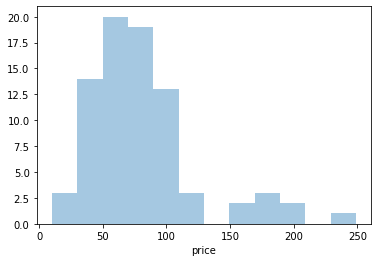

In [61]:
sns.distplot(pockets['price'], kde = False) #Why this type of chart? About variable types 

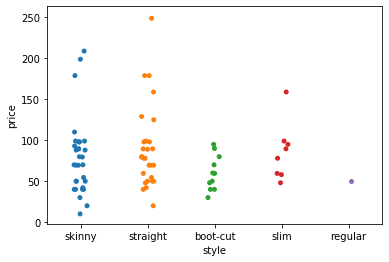

In [67]:
sns.stripplot(pockets['style'],pockets['price'], jitter = True) #Why this type of chart?

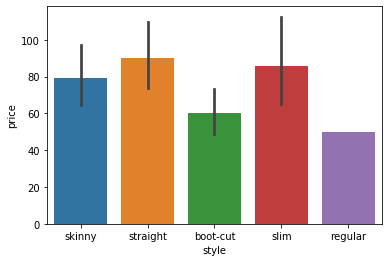

In [64]:
sns.barplot(pockets['style'],pockets['price'])

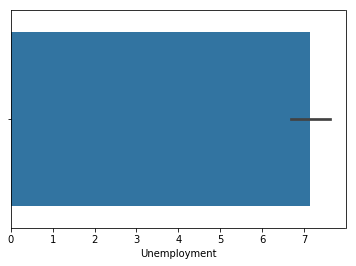

In [16]:
sns.barplot(unemp['Unemployment'])

In [17]:
sns.barplot(unemp['State'],unemp['Unemployment'])

KeyError: 'State'

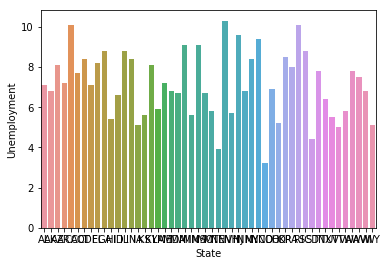

In [20]:
sns.barplot(unemp.index,unemp['Unemployment'])

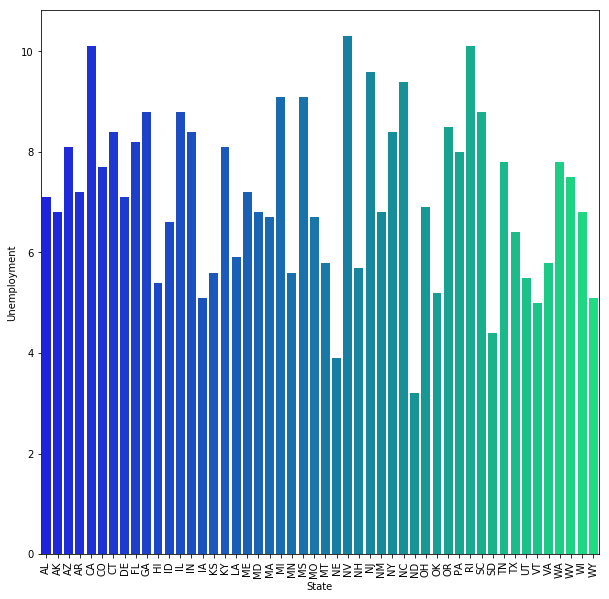

In [ ]:
# Go back to pockets data
# Plot average price by style

In [142]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout,cotton_over_90,cotton
0,Arizona,skinny,women,Fave Super Skinny,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False,False,78.0
1,Arizona,straight,women,Perfect Boot,"78% COTTON, 20% POLYESTER, 2% SPANDEX",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False,False,78.0
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False,True,92.0
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% COTTON, 7% POLY, 1% ELASTANE",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False,True,92.0
4,Uniqlo,skinny,women,Skinny Fit,"87% COTTON, 9% POLYESTER, 4% SPANDEX",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False,False,87.0


In [140]:
#By default, will plot the means, and will draw error bars

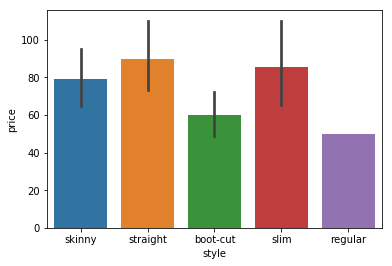

In [141]:
sns.barplot(pockets['style'], pockets['price'])

In [ ]:
#plot from command line